## SymPy

In [1]:
from sympy import *

### Использование символов

In [2]:
x + 1

NameError: name 'x' is not defined

In [3]:
x = symbols('x')
x+1

x + 1

In [4]:
expr = x + 1
expr

x + 1

In [5]:
x = 2 # заменяет только значение переменной
expr

x + 1

In [6]:
x = symbols('x')
expr = x + 1
expr.subs(x, 2) # замена символа на число или другой символ

3

### Уравнения

In [7]:
x + 1 == 4  # SymPy игнорирет знак == и использует его для булевого сравнения
x = Symbol('x')

In [8]:
Eq(x + 1, 4)

Eq(x + 1, 4)

In [9]:
(x+1)**2 == x**2 + 2*x + 1 # сравнивает структуру выржений

False

In [10]:
a = (x+1)**2
b = x**2 + 2*x + 1
simplify(a - b) # упрощение выражения

0

In [11]:
c = x**2 - 2*x + 1
simplify(a - c)

4*x

In [12]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b) # сравнение двух выражений

True

### ^ и /

In [13]:
True ^ False

True

In [14]:
True ^ True

False

In [15]:
x = symbols('x')
y = symbols('y')
Xor(x, y)

Xor(x, y)

In [16]:
type(Integer(1) + 1)

sympy.core.numbers.Integer

In [17]:
type(1 + 1)

int

In [18]:
Integer(1)/Integer(3)

1/3

In [19]:
type(Integer(1)/Integer(3))

sympy.core.numbers.Rational

In [20]:
x + 1/2

x + 0.5

In [21]:
x + Rational(1, 2)

x + 1/2

### Substitution

In [22]:
x, y, z = symbols('x y z')

In [23]:
expr = cos(x) + 1
expr.subs(x, y) # замена символа на символ, возвращает новое выражение

cos(y) + 1

In [24]:
expr.subs(x, 0) # замена символа на число

2

In [25]:
expr = x**y
expr

x**y

In [26]:
expr = expr.subs(y, x**y) # замена символа на выражение
expr

x**(x**y)

In [27]:
expr = expr.subs(y, x**x)
expr

x**(x**(x**x))

In [28]:
expr = sin(2*x) + cos(2 * x)
expand_trig(expr) # "разворачивает" выражение, возвращает новое

2*sin(x)*cos(x) + 2*cos(x)**2 - 1

In [29]:
expr = x**3 + 4*x*y -z
expr.subs([(x, 2), (y, 4), (z, 0)]) # заменяет все указанные переменные в выражении

40

In [30]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

-4*x**3 - 2*x + y**4 + 4*y**2 + 3

### Преобразование строки в выражение

In [31]:
sym_expr = 'x**2 + 3*x - 1/2'
expr = sympify(sym_expr) # преобразует строку в выражение
expr

x**2 + 3*x - 1/2

In [32]:
expr.subs(x, 2)

19/2

### evalf

In [33]:
expr = sqrt(8)
expr

2*sqrt(2)

In [34]:
expr.evalf()  # вычисляет выражение

2.82842712474619

In [35]:
pi.evalf(100) # число символов

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [36]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

In [37]:
one = cos(1)**2 + sin(1)**2
(one -1).evalf() # ошибка округления

-0.e-124

In [38]:
(one - 1).evalf(chop=True) # удаление бесконечно малых

0

### lambdify

In [39]:
import numpy as np
a = np.arange(10)
expr = sin(x)
f = lambdify(x, expr, "numpy") # преобразует выражение SciPy в выражение NumPy, аналог lambda
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [40]:
f = lambdify(x, expr, "math") # преобразует выражение SciPy в выражение math
f(0.1)

0.09983341664682815

In [41]:
def mysin(x):
    """
    My sine. Note that this is only accurate for small x.
    """
    return x
f = lambdify(x, expr, {"sin":mysin}) # использование с библиотеками, которые не определены в SymPy
f(0.1)

0.1

### Упрощение, факторизация

#### simplify()

In [42]:
x, y, z = symbols('x y z')
simplify(sin(x)**2 + cos(x)**2)

1

In [43]:
simplify((x**3 + x**2 - x -1)/(x**2 + 2*x +1))

x - 1

In [44]:
simplify(gamma(x)/gamma(x-2))

(x - 2)*(x - 1)

In [45]:
simplify(x**2 + 2*x + 1) # упрощения не произошло

x**2 + 2*x + 1

#### expand()

In [46]:
expand((x+1)**2) # представляет произведение в виде суммы слагаемых

x**2 + 2*x + 1

In [47]:
expand((x+2)*(x-3))

x**2 - x - 6

In [48]:
expand((x+1)*(x-2) - (x-1)*x)

-2

#### factor()

In [49]:
factor(x**3 - x**2 + x -1) # "сворачивает" выражение

(x - 1)*(x**2 + 1)

In [50]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

z*(x + 2*y)**2

In [51]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z) # возвращает список множителей

(1, [(z, 1), (x + 2*y, 2)])

In [52]:
expand((cos(x) + sin(x))**2)

sin(x)**2 + 2*sin(x)*cos(x) + cos(x)**2

In [53]:
factor(sin(x)**2 + 2*sin(x)*cos(x) + cos(x)**2)

(sin(x) + cos(x))**2

In [54]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

x**3 - x**2*z + 2*x**2 + x*y + x - 3

In [55]:
collected_expr = collect(expr, x) # выражение относительно степеней x
collected_expr

x**3 + x**2*(2 - z) + x*(y + 1) - 3

In [56]:
collected_expr.coeff(x, 2) # коэффициент при x^2

2 - z

#### cancel()

In [57]:
cancel((x**2 + 2*x + 1)/(x**2 + x)) # упрощает дробь

(x + 1)/x

In [58]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

(3*x/2 - 2)/(x - 4) + 1/x

In [59]:
cancel(expr) # приводит дроби к общему знаменателю

(3*x**2 - 2*x - 8)/(2*x**2 - 8*x)

In [60]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 -1)
expr

(x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)

In [61]:
cancel(expr)

(y**2 - 2*y*z + z**2)/(x - 1)

In [62]:
factor(expr)

(y - z)**2/(x - 1)

#### apart()

In [63]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

(4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

In [64]:
apart(expr) # разбиени дроби на сумму дробей

(2*x - 1)/(x**2 + x + 1) - 1/(x + 4) + 3/x

#### trigsimp()

In [65]:
acos(x)

acos(x)

In [66]:
cos(acos(x))

x

In [67]:
asin(1)

pi/2

In [68]:
trigsimp(sin(x)**2 + cos(x)**2)

1

In [69]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

cos(4*x)/2 + 1/2

In [70]:
trigsimp(sin(x)*tan(x)/sec(x))

sin(x)**2

In [71]:
trigsimp(cosh(x)**2 + sinh(x)**2)

cosh(2*x)

In [72]:
trigsimp(sinh(x)/tanh(x))

cosh(x)

#### expand_trig

In [73]:
expand_trig(sin(x + y)) # "разворачивает" тригонометрически функции

sin(x)*cos(y) + sin(y)*cos(x)

In [74]:
expand_trig(tan(2*x))

2*tan(x)/(1 - tan(x)**2)

In [75]:
trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

sin(x + y)

#### powsimp()

In [76]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [77]:
powsimp(x**a*x**b)

x**(a + b)

In [78]:
powsimp(x**a*y**a)

(x*y)**a

In [79]:
powsimp(t**c*z**c)

t**c*z**c

In [80]:
powsimp(t**c*z**c, force=True)

(t*z)**c

#### expand_power_exp / expand_power_base

In [81]:
expand_power_exp(x**(a+b))

x**a*x**b

In [82]:
expand_power_base((x*y)**a)

x**a*y**a

#### powdenest()

In [83]:
powdenest((x**a)**b)

x**(a*b)

#### expand_log()

In [84]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

In [85]:
expand_log(log(x*y))

log(x) + log(y)

In [86]:
expand_log(log(x/y))

log(x) - log(y)

#### logcombine()

In [87]:
logcombine(log(x) + log(y))

log(x*y)

### Дифференцирование

In [88]:
x, y, z = symbols('x y z')

In [89]:
diff(cos(x), x) # вычисление производной

-sin(x)

In [90]:
diff(x**4, x, x, x)  # взятие нескольких производных

24*x

In [91]:
expr = exp(x*y*z)
expr.diff(x, y, y, z, 4)

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

In [92]:
deriv = Derivative(expr, x, y, y, z, 4) # запись производной без вычисления
deriv

Derivative(exp(x*y*z), x, (y, 2), (z, 4))

In [93]:
deriv.doit() # вычисление производной

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

In [94]:
m, n, a, b = symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n)) # n-я производная по x

Derivative((a*x + b)**m, (x, n))

### Интегрирование

In [95]:
integrate(cos(x), x) # взятие неопределённого интеграла

sin(x)

In [96]:
integrate(exp(-x), (x, 0, oo)) # взятие определённого интеграла

1

In [97]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)) # интегрирование по двум переменным

pi

In [98]:
expr = integrate(x**x, x)
print(expr)

Integral(x**x, x)


In [99]:
expr # неопределённый интеграл

Integral(x**x, x)

In [100]:
expr = Integral(log(x)**2, x)
expr

Integral(log(x)**2, x)

In [101]:
expr.doit()

x*log(x)**2 - 2*x*log(x) + 2*x

### Пределы

In [102]:
limit(sin(x)/x, x, 0) # вычисление предела

1

In [103]:
expr = x**2/exp(x)
expr.subs(x, oo)

nan

In [104]:
limit(expr, x, oo)

0

In [105]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

Limit((cos(x) - 1)/x, x, 0)

In [106]:
expr.doit()

0

In [107]:
limit(1/x, x, 0, '+') # x -> +0

oo

In [108]:
limit(1/x, x, 0, '-') # x -> -0

-oo

### Ряды

In [109]:
expr = exp(sin(x))
expr.series(x, 0, 4) # разложение в ряд

1 + x + x**2/2 + O(x**4)

In [110]:
x + x**3 + x**6 + O(x**4)

x + x**3 + O(x**4)

In [111]:
expr.series(x, 0, 4).removeO() # убирает О

x**2/2 + x + 1

In [112]:
exp(x - 6).series(x, x0=6)

-5 + (x - 6)**2/2 + (x - 6)**3/6 + (x - 6)**4/24 + (x - 6)**5/120 + x + O((x - 6)**6, (x, 6))

### Конечные разности

In [113]:
f, g = symbols('f g', cls=Function)
differentiate_finite(f(x)*g(x)) # дифференцирование с использованием конечных разностей

-f(x - 1/2)*g(x - 1/2) + f(x + 1/2)*g(x + 1/2)

In [114]:
differentiate_finite(f(x)*g(x), evaluate=True)

(-f(x - 1/2) + f(x + 1/2))*g(x) + (-g(x - 1/2) + g(x + 1/2))*f(x)

### Решение алгебраических уравнений

In [115]:
solveset(x**2 -x, x) # решение алгебраического уравнения

{0, 1}

In [116]:
solveset(sin(x) -1, x, domain=S.Reals) # только действиетльные решения

ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers)

In [117]:
linsolve([x + y + z -1, x + y + 2*z -3], (x, y, z)) # решение СЛАУ, список уравнений

{(-y - 1, y, 2)}

In [118]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z)) # решение СЛАУ, матрица системы

{(-y - 1, y, 2)}

In [119]:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3))) # решение СЛАУ, A*x = b
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, x, y, z)

{(-y - 1, y, 2)}

In [120]:
nonlinsolve([x*y -1, x -2], x, y) # решение системы нелинейных алгебраических уравнений

{(2, 1/2)}

In [121]:
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

{(-I, -I), (-I, I), (I, -I), (I, I)}

In [122]:
nonlinsolve([x**2 - 2*y**2 - 2, x*y - 2], [x, y])

{(-2, -1), (2, 1), (-sqrt(2)*I, sqrt(2)*I), (sqrt(2)*I, -sqrt(2)*I)}

In [123]:
nonlinsolve([x*y, x*y - x], [x, y])

{(0, y)}

### Решение дифференциальных уравнений

In [124]:
f, g  = symbols('f g', cls=Function)
print(f(x))
f(x).diff(x)

f(x)


Derivative(f(x), x)

In [125]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x)) # задаём дифференциальное уравнение
diffeq

Eq(f(x) - 2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), sin(x))

In [126]:
dsolve(diffeq, f(x)) # решаем егоб возвращает Eq

Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)

In [127]:
dsolve(f(x).diff(x)*(1 - sin(f(x))) -1, f(x)) # невозможно решить уравнение для f(x)

Eq(-x + f(x) + cos(f(x)), C1)

### Матричные операции

In [128]:
Matrix([[1, -1], [3, 4], [0, 2]]) # матрица

Matrix([
[1, -1],
[3,  4],
[0,  2]])

In [129]:
Matrix([1, 2, 3]) # столбец

Matrix([
[1],
[2],
[3]])

In [130]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M * N # перемножение матриц

Matrix([
[5],
[3]])

In [131]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M

Matrix([
[ 1, 2, 3],
[-2, 0, 4]])

In [132]:
M.shape # размерность матрицы

(2, 3)

In [133]:
M.row(0) # получение строки матрицы

Matrix([[1, 2, 3]])

In [134]:
M.col(-1) # получение столбца матрицы

Matrix([
[3],
[4]])

In [135]:
M.col_del(0) # удаление стобца
M

Matrix([
[2, 3],
[0, 4]])

In [136]:
M.row_del(1) # удаление строки
M

Matrix([[2, 3]])

In [137]:
M = M.row_insert(1, Matrix([[0, 4]])) # вставка строки
M

Matrix([
[2, 3],
[0, 4]])

In [138]:
M = M.col_insert(0, Matrix([1, -2])) # вставка столбца
M

Matrix([
[ 1, 2, 3],
[-2, 0, 4]])

In [139]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
M + N # sum

Matrix([
[ 1,  6],
[-2, 10]])

In [140]:
M * N # mul

Matrix([
[0, 24],
[0, 15]])

In [141]:
3 * M

Matrix([
[ 3, 9],
[-6, 9]])

In [142]:
M**2 # pow

Matrix([
[-5, 12],
[-8,  3]])

In [143]:
M**-1 # inverse

Matrix([
[1/3, -1/3],
[2/9,  1/9]])

In [144]:
N**-1

ValueError: Matrix det == 0; not invertible.

In [145]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
M.T # transpose

Matrix([
[1, 4],
[2, 5],
[3, 6]])

In [146]:
eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [147]:
eye(4)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [148]:
zeros(2, 3)

Matrix([
[0, 0, 0],
[0, 0, 0]])

In [149]:
ones(3, 2) 

Matrix([
[1, 1],
[1, 1],
[1, 1]])

In [150]:
diag(1, 2, 3)

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [151]:
diag(-1, ones(2, 2), Matrix([5, 7, 5]))

Matrix([
[-1, 0, 0, 0],
[ 0, 1, 1, 0],
[ 0, 1, 1, 0],
[ 0, 0, 0, 5],
[ 0, 0, 0, 7],
[ 0, 0, 0, 5]])

In [152]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

Matrix([
[1,  0, 1],
[2, -1, 3],
[4,  3, 2]])

In [153]:
M.det() # determinant

-1

In [154]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, 4]])
M

Matrix([
[ 1,  0,  1, 3],
[ 2,  3,  4, 7],
[-1, -3, -3, 4]])

In [155]:
M.rref() # reduced row echelon form

(Matrix([
 [1, 0,   1, 0],
 [0, 1, 2/3, 0],
 [0, 0,   0, 1]]), (0, 1, 3))

In [156]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
M

Matrix([
[1,  2, 3, 0, 0],
[4, 10, 0, 0, 1]])

In [157]:
M.nullspace() # matrix kernel

[Matrix([
 [-15],
 [  6],
 [  1],
 [  0],
 [  0]]), Matrix([
 [0],
 [0],
 [0],
 [1],
 [0]]), Matrix([
 [   1],
 [-1/2],
 [   0],
 [   0],
 [   1]])]

In [158]:
M = Matrix([[1, 1, 2], [2, 1, 3], [3, 1, 4]])
M

Matrix([
[1, 1, 2],
[2, 1, 3],
[3, 1, 4]])

In [159]:
M.columnspace() # пространство столбцов

[Matrix([
 [1],
 [2],
 [3]]), Matrix([
 [1],
 [1],
 [1]])]

In [160]:
M = Matrix([[3, -2, 4, -2], [5, 3, -3, -2], [5, -2, 2, -2], [5, -2, -3, 3]])
M

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [161]:
M.eigenvals() # собственные значения

{3: 1, -2: 1, 5: 2}

In [162]:
M.eigenvects() # собственные вектора

[(-2, 1, [Matrix([
   [0],
   [1],
   [1],
   [1]])]), (3, 1, [Matrix([
   [1],
   [1],
   [1],
   [1]])]), (5, 2, [Matrix([
   [1],
   [1],
   [1],
   [0]]), Matrix([
   [ 0],
   [-1],
   [ 0],
   [ 1]])])]

In [163]:
P, D = M.diagonalize() # диагонализация
P

Matrix([
[0, 1, 1,  0],
[1, 1, 1, -1],
[1, 1, 1,  0],
[1, 1, 0,  1]])

In [164]:
D # диагональная

Matrix([
[-2, 0, 0, 0],
[ 0, 3, 0, 0],
[ 0, 0, 5, 0],
[ 0, 0, 0, 5]])

In [165]:
P*D*P**-1

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [166]:
P*D*P**-1 == M

True

### Графики

In [167]:
from sympy.plotting import plot
x = symbols('x')

In [168]:
p1 = plot(x*x, show=False)
p2 = plot(x, show=False)
p1.append(p2[0]) # добавляет один элемент из списка
print(p1)

Plot object containing:
[0]: cartesian line: x**2 for x over (-10.0, 10.0)
[1]: cartesian line: x for x over (-10.0, 10.0)


In [169]:
p1.show()

<Figure size 640x480 with 1 Axes>

In [170]:
p1 = plot(x*x, show=False)
p2 = plot(x, -x, show=False)
p1.extend(p2) # добавляет весь список
print(p1)

Plot object containing:
[0]: cartesian line: x**2 for x over (-10.0, 10.0)
[1]: cartesian line: x for x over (-10.0, 10.0)
[2]: cartesian line: -x for x over (-10.0, 10.0)


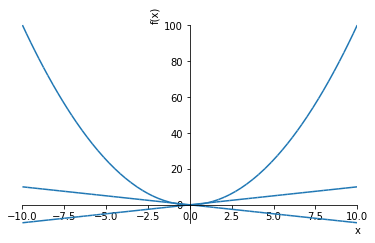

In [171]:
p1.show()

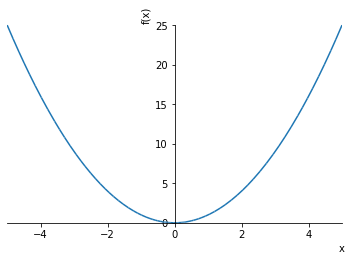

In [172]:
plot(x**2, (x, -5, 5)) # single plot

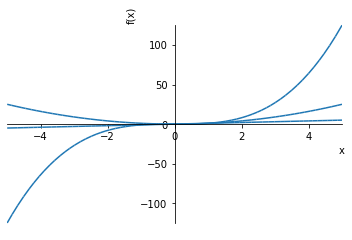

In [173]:
plot(x, x**2, x**3, (x, -5, 5)) # multiple plots, single range

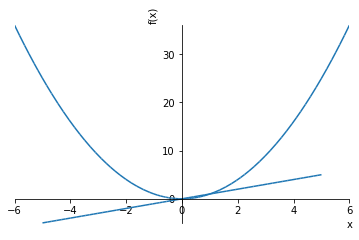

In [174]:
plot((x**2, (x, -6, 6)), (x, (x, -5, 5))) # multiple plots, different ranges

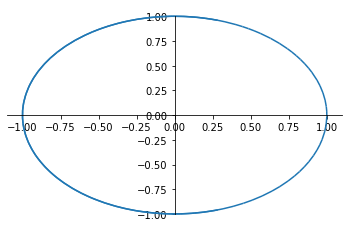

In [175]:
from sympy.plotting import plot_parametric
u = symbols('u')
plot_parametric(cos(u), sin(u), (u, -5, 5)) # parametric plot

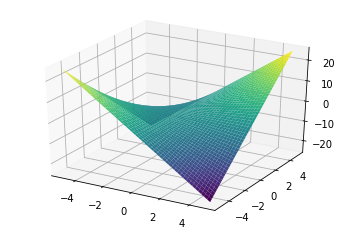

In [176]:
from sympy.plotting import plot3d
x, y = symbols('x y')
plot3d(x*y, (x, -5, 5), (y, -5, 5))

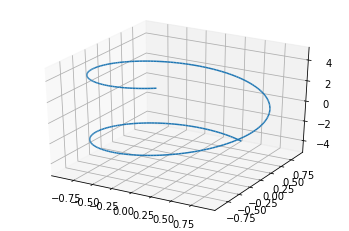

In [177]:
from sympy.plotting import plot3d_parametric_line
u = symbols('u')
plot3d_parametric_line(cos(u), sin(u), u, (u, -5, 5)) # 3d parametric line

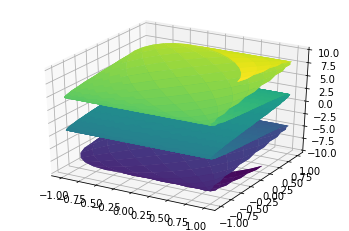

In [178]:
from sympy.plotting import plot3d_parametric_surface
u, v = symbols('u v')
plot3d_parametric_surface(cos(u + v), sin(u - v), u - v, (u, -5, 5), (v, -5, 5)) # 3d parametric surface

### Список источников
- https://docs.sympy.org/dev/tutorial/index.html
- https://github.com/sympy/sympy/wiki/Tutorial
- https://docs.sympy.org/dev/modules/plotting.html